In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df = pd.read_csv('data.csv')
df.head(5)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [ ]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64


In [ ]:
x = df.drop(columns = ['ID', 'class'])
y = df['class']
x.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

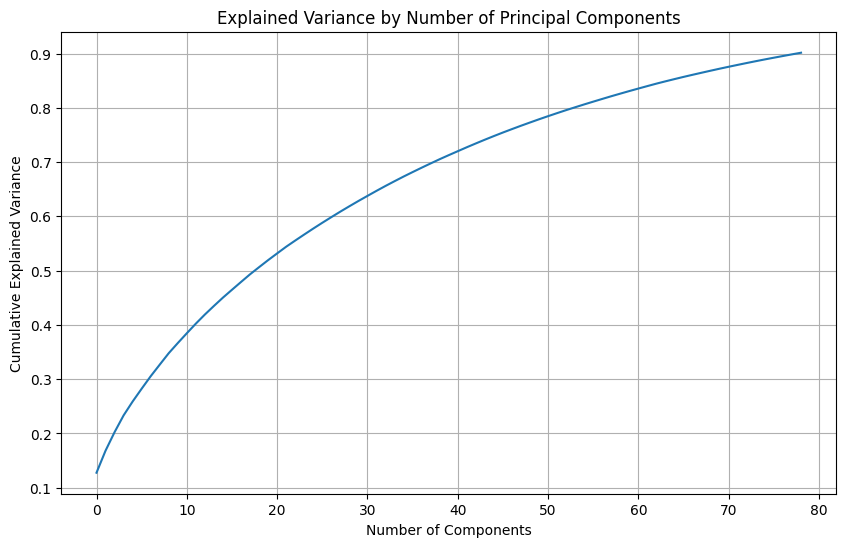

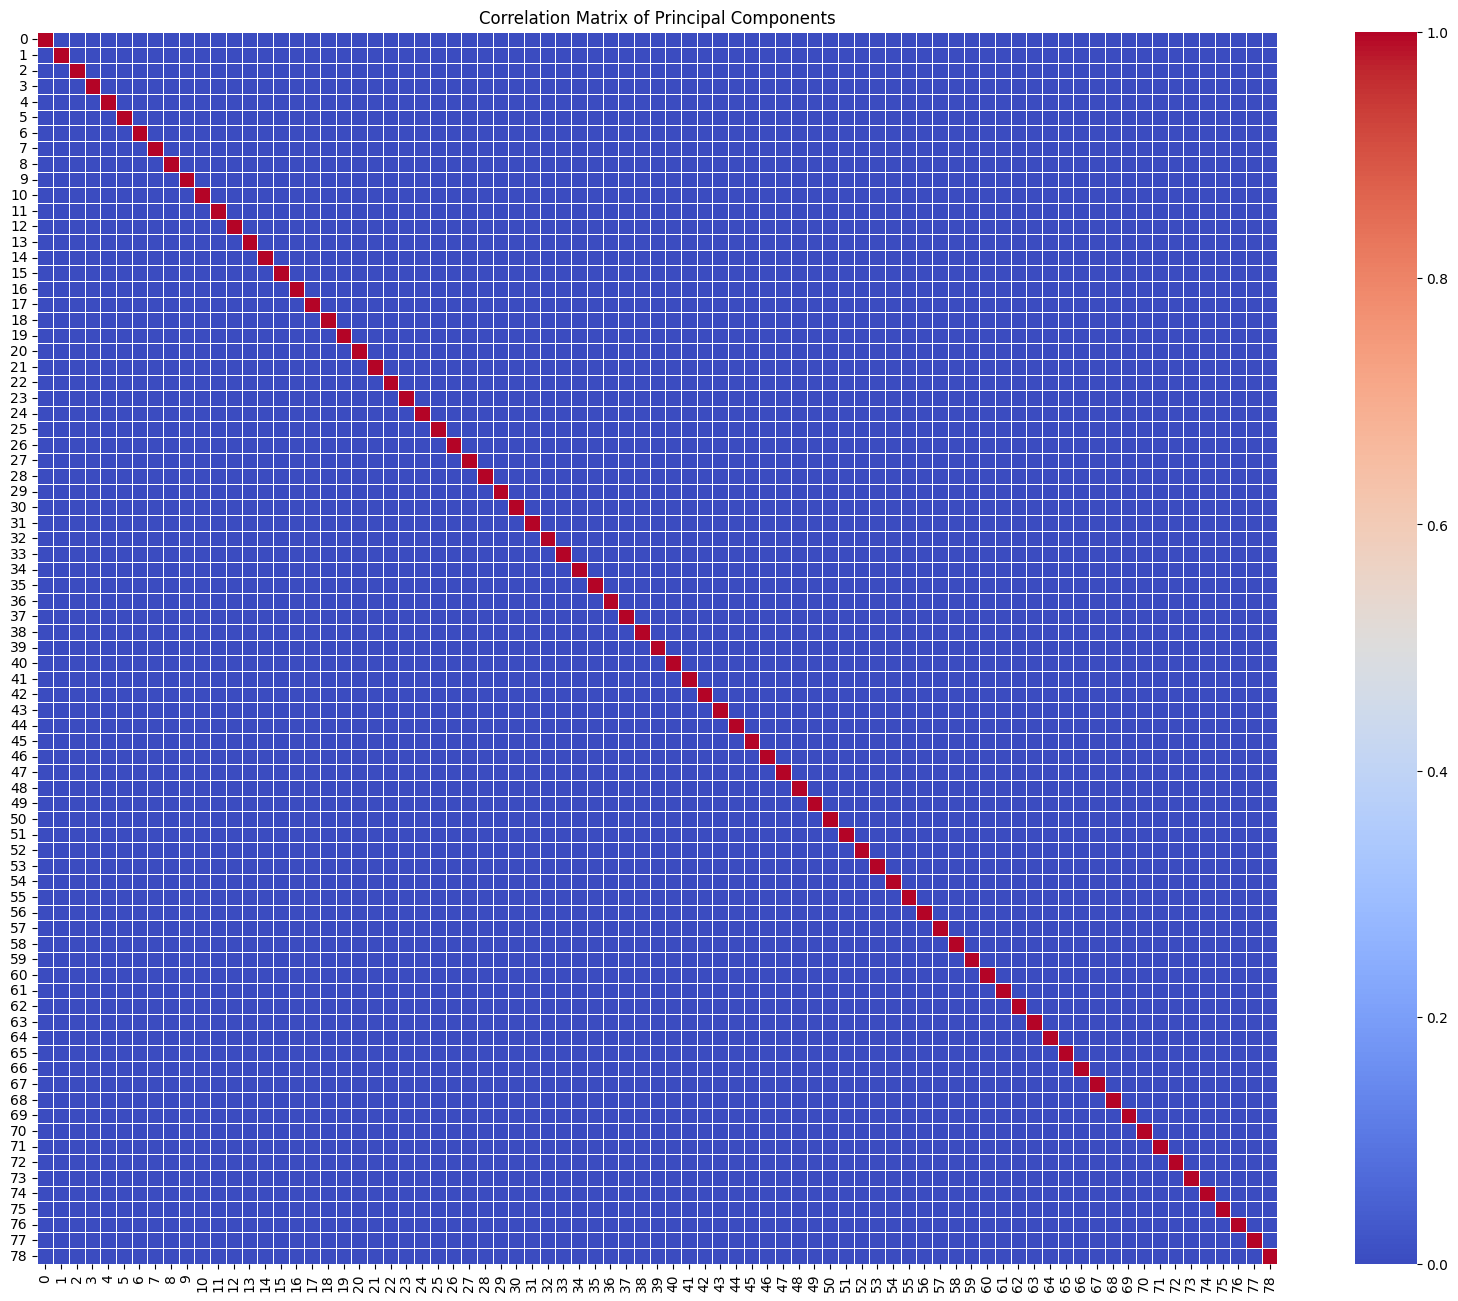

In [ ]:
# PCA to eliminate number of features
pca = PCA(n_components=0.90)  #keep 90% of variance
x_pca = pca.fit_transform(x_scaled)
x_pca = pd.DataFrame(x_pca)

# Visualize the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Visualization - Correlation Matrix of Principal Components
plt.figure(figsize=(20, 16))
corr_matrix = pd.DataFrame(x_pca).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Principal Components')
plt.show()

In [ ]:
x_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 79 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       174 non-null    float64
 1   1       174 non-null    float64
 2   2       174 non-null    float64
 3   3       174 non-null    float64
 4   4       174 non-null    float64
 5   5       174 non-null    float64
 6   6       174 non-null    float64
 7   7       174 non-null    float64
 8   8       174 non-null    float64
 9   9       174 non-null    float64
 10  10      174 non-null    float64
 11  11      174 non-null    float64
 12  12      174 non-null    float64
 13  13      174 non-null    float64
 14  14      174 non-null    float64
 15  15      174 non-null    float64
 16  16      174 non-null    float64
 17  17      174 non-null    float64
 18  18      174 non-null    float64
 19  19      174 non-null    float64
 20  20      174 non-null    float64
 21  21      174 non-null    float64
 22  22

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=123)

In [ ]:
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC()
rf_model = RandomForestClassifier()

In [ ]:
# Hyperparameter tuning using GridSearchCV
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [ ]:
# Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
logistic_model = hyperparameter_tuning(LogisticRegression(), logistic_param_grid, X_train, y_train)

Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}


In [ ]:
# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_model = hyperparameter_tuning(KNeighborsClassifier(), knn_param_grid, X_train, y_train)

Best parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
# Support Vector Machine
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
svm_model = hyperparameter_tuning(SVC(), svm_param_grid, X_train, y_train)

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}


In [ ]:
# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = hyperparameter_tuning(RandomForestClassifier(), rf_param_grid, X_train, y_train)

Best parameters for RandomForestClassifier: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', min_samples_split=5)

In [ ]:
# Make predictions
logistic_pred = logistic_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

Logistic Regression Model
Accuracy: 0.8857142857142857
Classification Report:
               precision    recall  f1-score   support

           H       0.92      0.92      0.92        24
           P       0.82      0.82      0.82        11

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35

Confusion Matrix:
 [[22  2]
 [ 2  9]]


K-Nearest Neighbors Model
Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

           H       0.73      1.00      0.84        24
           P       1.00      0.18      0.31        11

    accuracy                           0.74        35
   macro avg       0.86      0.59      0.57        35
weighted avg       0.81      0.74      0.67        35

Confusion Matrix:
 [[24  0]
 [ 9  2]]


Support Vector Machine Model
Accuracy: 0.8
Classification Report:
               precision    recall  f1-sco

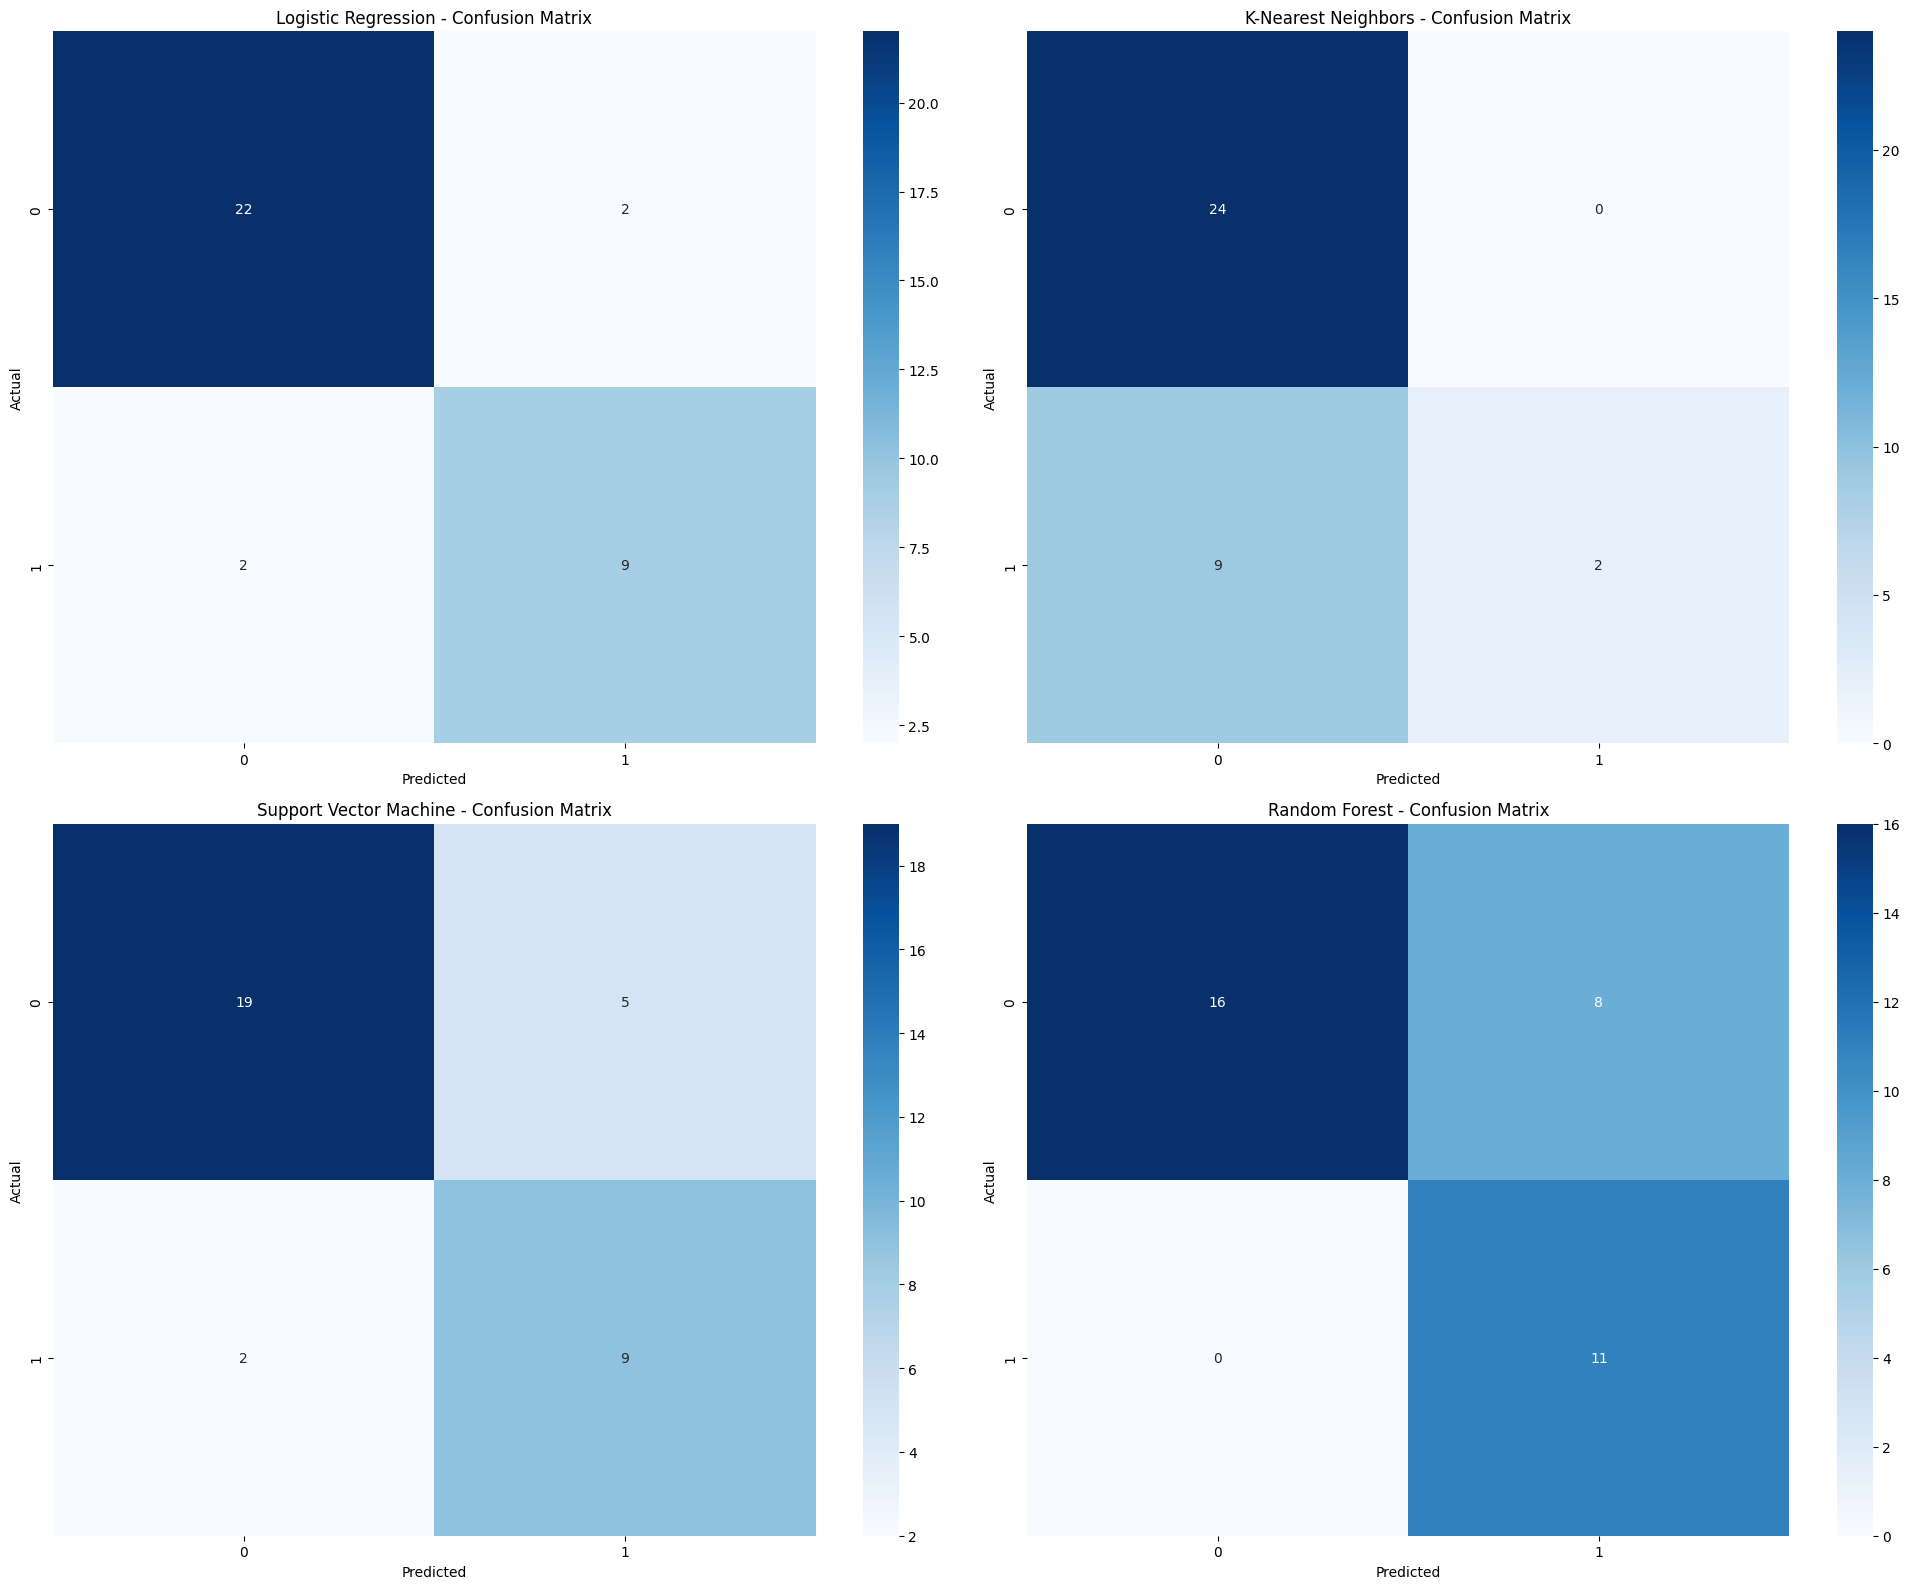

In [ ]:
# Evaluate the models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Model")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

evaluate_model("Logistic Regression", y_test, logistic_pred)
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)
evaluate_model("Support Vector Machine", y_test, svm_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# Visualization - Confusion Matrices
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
predictions = [logistic_pred, knn_pred, svm_pred, rf_pred]

plt.figure(figsize=(20, 16))
for i, (model, pred) in enumerate(zip(models, predictions), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()